In [1]:
# IMPORTING THE REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import pandas.plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris=pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.shape

(150, 5)

In [7]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
# CHECK FOR NULL VALUES

In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris.isnull().sum().sum()

0

In [11]:
# VISUALIZATION

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='sepal_length',y='petal_length',data=df.sort_values('sepal_length',ascending=False))

NameError: name 'df' is not defined

<Figure size 1500x800 with 0 Axes>

In [13]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5)

NameError: name 'df' is not defined

In [14]:
sns.jointplot(x="petal_length", y="petal_width", data=df, size=5)

NameError: name 'df' is not defined

In [15]:
sns.pairplot(df, hue="species", height=5)

NameError: name 'df' is not defined

<Axes: >

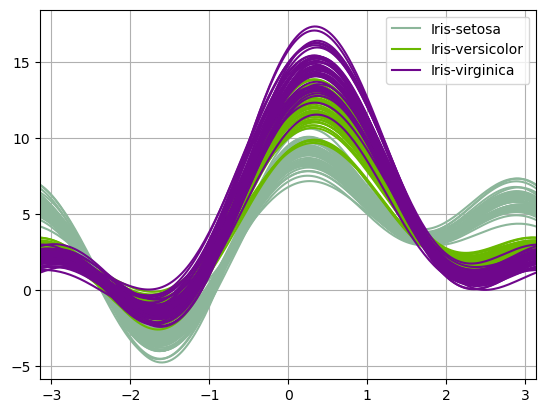

In [16]:
from pandas.plotting import andrews_curves
andrews_curves(iris, "species")

In [17]:
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=df.sort_values('sepal_width',ascending=False),kind='boxen')

NameError: name 'df' is not defined

<Figure size 1500x1500 with 0 Axes>

NameError: name 'df' is not defined

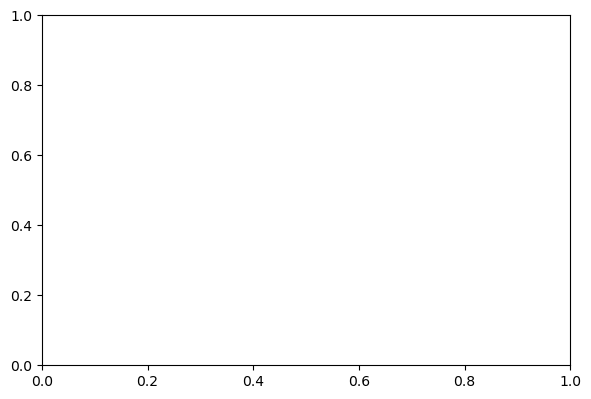

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

In [19]:
# MODEL CREATION

In [20]:
X=iris.drop('species',axis=1)
y=iris['species']

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [22]:
iris['species'] = pd.Categorical(iris.species)
iris['species'] = iris.species.cat.codes
y = to_categorical(iris.species)

In [23]:
# MODEL TRAINING

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [25]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))
model.add(Dense(3,activation='softmax'))

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3177 - loss: 1.2198 - val_accuracy: 0.3333 - val_loss: 1.0652
Epoch 2/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2460 - loss: 1.0705 - val_accuracy: 0.3333 - val_loss: 1.0157
Epoch 3/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3375 - loss: 0.9743 - val_accuracy: 0.5556 - val_loss: 0.9603
Epoch 4/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5657 - loss: 0.9330 - val_accuracy: 0.6667 - val_loss: 0.9051
Epoch 5/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6792 - loss: 0.8746 - val_accuracy: 0.6667 - val_loss: 0.8531
Epoch 6/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6469 - loss: 0.8350 - val_accuracy: 0.8889 - val_loss: 0.8025
Epoch 7/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8561 - loss: 0.7962 - val_accuracy: 0.8222 - val_loss: 0.7624
Epoch 8/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8998 - loss: 0.7497 - val_accuracy: 0.6667 - val_loss: 0.7376


In [28]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9199 - loss: 0.3634  


[0.3719412684440613, 0.9111111164093018]

In [29]:
pred = model.predict(X_test[:10])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.01218472 0.41992244 0.5678928 ]
 [0.92476165 0.06545088 0.00978748]
 [0.05322916 0.5681172  0.37865368]
 [0.02440026 0.54930556 0.42629415]
 [0.9556303  0.03921999 0.00514962]
 [0.00148591 0.272989   0.72552514]
 [0.01043553 0.42234755 0.5672169 ]
 [0.01773661 0.43556494 0.5466984 ]
 [0.00265101 0.27184117 0.72550774]
 [0.00245258 0.23449758 0.7630499 ]]


In [30]:
history.history['accuracy']

[0.3333333432674408,
 0.21904762089252472,
 0.3333333432674408,
 0.6095238327980042,
 0.6666666865348816,
 0.6666666865348816,
 0.8095238208770752,
 0.8666666746139526,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7047619223594666,
 0.6761904954910278,
 0.6666666865348816,
 0.6857143044471741,
 0.6857143044471741,
 0.723809540271759,
 0.7142857313156128,
 0.761904776096344,
 0.8571428656578064,
 0.9428571462631226,
 0.961904764175415,
 0.9714285731315613,
 0.8476190567016602,
 0.723809540271759,
 0.7523809671401978,
 0.8571428656578064,
 0.9333333373069763,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9428571462631226,
 0.8571428656578064,
 0.8857142925262451,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.961904764175415,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613]

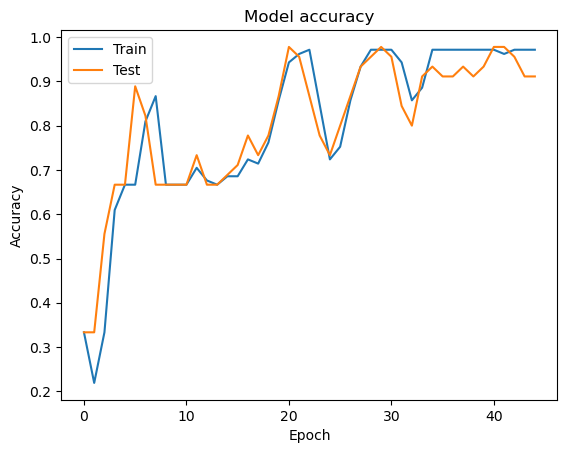

In [31]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()